<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#일표본-t-test" data-toc-modified-id="일표본-t-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>일표본 t-test</a></span></li><li><span><a href="#대응표본-t-test" data-toc-modified-id="대응표본-t-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>대응표본 t-test</a></span></li><li><span><a href="#독립표본-t-test" data-toc-modified-id="독립표본-t-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>독립표본 t-test</a></span></li></ul></div>

# 일표본 t-test

 cats 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지 통계적 검정을 수행하고, 결과를 해석해보자(양측검정, 유의수준 : 0.05).

In [1]:
import pandas as pd
cats=pd.read_csv('../data/cats.csv')
cats


,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


Bwt 컬럼은 고양이의 몸무게를 의미하고, Hwt는 고양이의 길이를 의미한다. 
cats의 데이터의 정보를 info로 확인해준다. 

In [2]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


shapiro test를 통해 데이터의 정규성을 검정한다. 고양이의 몸무게를 검정하므로 고양이의 몸무게만 추출하여 shapiro test를 진행해야 한다. 

In [3]:
import scipy.stats as stats
from scipy.stats import shapiro
mu =2.6
shapiro(cats['Bwt'])


ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

[결과해석]
첫번째 값 (검정통계치) : 0.95187
두번째 값 (p-value) : 6.730e-05
유의수준보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다. 즉, cats 데이이터의 Bwt 변수는 정규분포를 따르지 않는다. 데이터가 정규분포를 따르지 않으므로 wilcox test 로 t-test를 진행한다. 만약, 정규분포를 따른다면 stats.ttest_1samp(cats.Bwt, popmean=mu)를 사용하면 된다. 

In [4]:
stats.wilcoxon(cats.Bwt - mu , alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

Text(0, 0.5, 'Count')

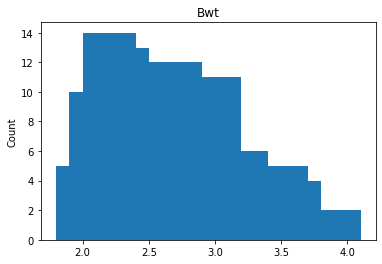

In [5]:
import matplotlib.pyplot as plt
cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)
width =0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values,width)
plt.title('Bwt')
plt.ylabel('Count')


# 대응표본 t-test

10명의 환자 대상 수면영양제 복용 전과 후의 수면시간을 측정하였다.  
영양제의 효과가 있는지를 판단해보자. 

In [6]:
# 데이터 불러오기 및 확인 
import pandas as pd 
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data


,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


해당 데이터를 검정하기 위한 가설 수립한다.  <br> <br>
귀무가설(H0) <br>
수면제 복용 전과 후의 수면시간 차이는 없다. <br>
대립가설(H1)<br>
수면제 복용 전과 후의 수면시간 차이는 있다. <br>


In [7]:
stats.ttest_rel(data['after'],data['before'],alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082765)

In [8]:
data.mean()

before    4.3
after     5.3
dtype: float64

[결과해석]
p-value가 유의수준보다 작으므로 '수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다'는 결론을 낼 수 있다. 

# 독립표본 t-test

In [9]:
import pandas as pd
cats=pd.read_csv('../data/cats.csv')

female = cats.loc[cats.Sex =='F', 'Bwt']
male = cats.loc[cats.Sex =='M', 'Bwt']
stats.levene(female, male)


LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [10]:
stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [11]:
print(female.mean())
print(male.mean())


2.359574468085107
2.8999999999999995


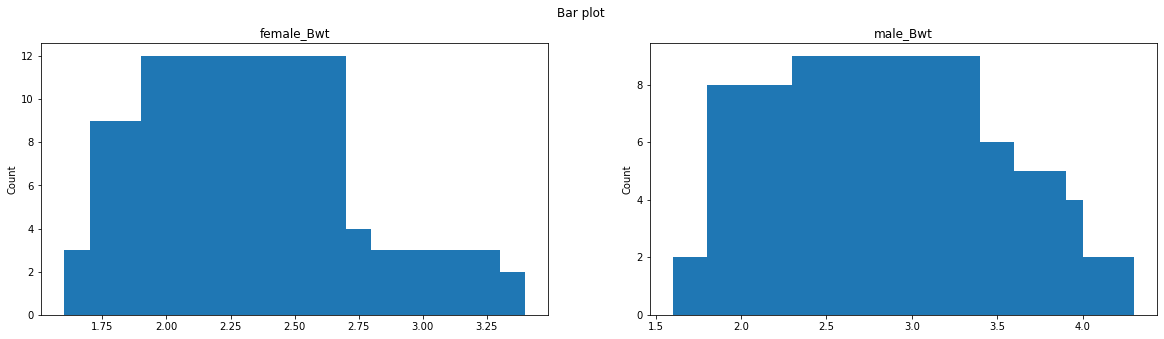

In [12]:
female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)
fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#일원배치-분산분석" data-toc-modified-id="일원배치-분산분석-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>일원배치 분산분석</a></span></li><li><span><a href="#이원배치-분산분석" data-toc-modified-id="이원배치-분산분석-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>이원배치 분산분석</a></span></li></ul></div>

# 일원배치 분산분석

In [1]:
import scipy.stats as stats  
import pandas as pd
Iris_data = pd.read_csv("../data/iris.csv")
Iris_data.head(100)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [2]:
Iris_data["target"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
Iris_data.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [4]:
target_list = Iris_data["target"].unique()
setosa = Iris_data[Iris_data["target"]==target_list[0]]["sepal width"]
versicolor = Iris_data[Iris_data["target"]==target_list[1]]["sepal width"]
virginica = Iris_data[Iris_data["target"]==target_list[2]]["sepal width"]
print(target_list)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


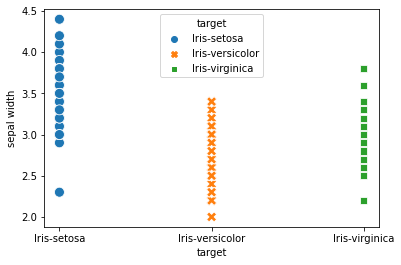

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot by Groups
sns.scatterplot(x='target', 
                y='sepal width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=100, # marker size
                data=Iris_data)
plt.show()


In [6]:
print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))


ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [7]:
stats.levene(setosa,versicolor,virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [8]:
stats.f_oneway(setosa,versicolor,virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


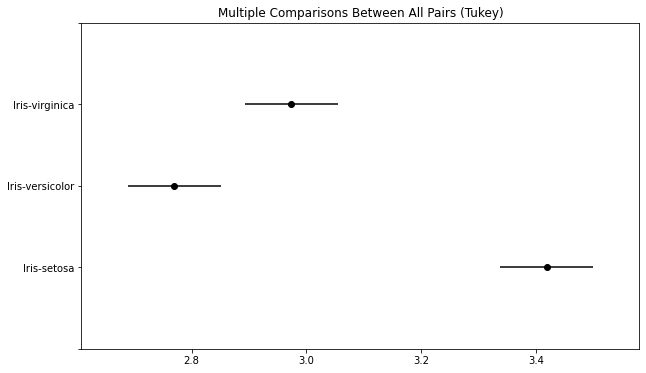

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data= Iris_data["sepal width"], groups=Iris_data["target"] )
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()


In [10]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.001,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.001,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.0089,0.0428,0.3652,True


In [11]:
stats.kruskal(setosa,versicolor,virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [12]:
# pip install pingouin 
# conda install pingouin
import pingouin as pg
pg.welch_anova(data = Iris_data, dv ='sepal width', between='target')


,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


# 이원배치 분산분석

In [1]:
# 데이터 불러오기
import pandas as pd
mtcars = pd.read_csv('../data/mtcars.csv')
mtcars.head()


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
## cyl, am, mpg 변수들로만 구성된 분석용 데이터셋 생성 
mtcars = mtcars[["mpg","am","cyl"]]
mtcars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [3]:
## 분산분석 수행 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


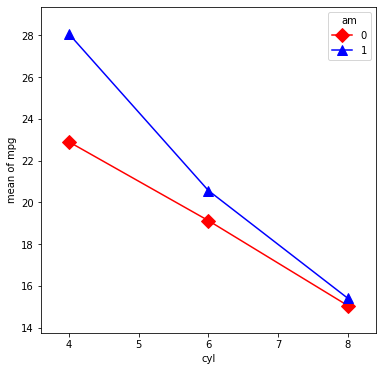

In [4]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

## 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 
cyl = mtcars["cyl"]
am = mtcars["am"]
mpg = mtcars["mpg"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(cyl,am, mpg,
                       colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#적합도-검정" data-toc-modified-id="적합도-검정-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>적합도 검정</a></span></li><li><span><a href="#독립성-검정" data-toc-modified-id="독립성-검정-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>독립성 검정</a></span></li></ul></div>

## 적합도 검정

In [1]:
import pandas as pd
# 데이터 불러오기
df = pd.read_csv("../data/titanic.csv")
# titinic 데이터의 구조 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [2]:
df_t = df[df['survived']==1]
table= df_t[['sex']].value_counts()
table


sex   
female    233
male      109
dtype: int64

In [3]:
# 유의수준 0.05로 적합도 검정 수행
from scipy.stats import chisquare
chi = chisquare(table, f_exp=[171,171])
print('<적합도 검정>\n',chi)


<적합도 검정>
 Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


## 독립성 검정

In [4]:
# 데이터 불러오기
df = pd.read_csv("../data/titanic.csv")
table = pd.crosstab(df['class'], df['survived'])
table


survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [5]:
# 카이제곱 검정을 통한 독립성 검정 수행
from scipy.stats import chi2_contingency
chi, p, df, expect = chi2_contingency(table) 
print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)


Statistic: 102.88898875696056
p-value: 4.549251711298793e-23
df: 2
expect: 
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [13]:
import pandas as pd 
import numpy as np 
house = pd.read_csv('../data/kc_house_data.csv')
house = house[["price","sqft_living"]]
## 독립변수와 종속변수의 선형 가정 
house.corr()


,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


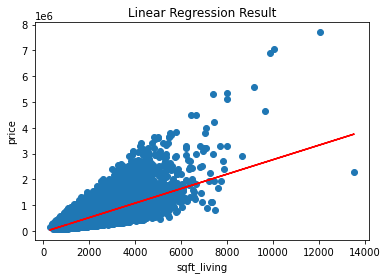

In [14]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
# 변수 할당 
y = house['price']
X = house[['sqft_living']]
# 단순선형회귀모형 적합
lr = ols('price ~ sqft_living',data=house).fit()
y_pred = lr.predict(X)
# 시각화 
plt.scatter(X, y) ## 원 데이터 산포도
plt.plot(X, y_pred, color='red') ## 회귀직선 추가 
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price',fontsize=10)
plt.title('Linear Regression Result')
plt.show()


In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:53:51   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1.5

In [17]:
import pandas as pd
# 데이터 불러오기
Cars = pd.read_csv('../data/Cars93.csv')
Cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [18]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# ols 모델의 formula을 정의할 때, 일부 특수문자는 쓸 수 없기에, 컬럼 특수문자 제거 
Cars.columns = Cars.columns.str.replace(".","")
model = smf.ols(formula ="Price ~ EngineSize + RPM + Weight+ Length + MPGcity + MPGhighway", data = Cars)
result = model.fit()
result.summary()


C:\Users\jjang\anaconda3\envs\ADP_Class\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           4.88e-14
Time:                        23:54:52   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
Cars[['EngineSize','RPM' , 'Weight','Length','MPGcity','MPGhighway']].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [20]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 독립변수와 종속변수를 데이터프레임으로 나누어 저장하는 함수 
y,X = dmatrices("Price ~ EngineSize + RPM + Weight+ Length + MPGcity + MPGhighway",
                data = Cars,return_type ="dataframe")
# 독립변수끼리의 VIF값을 계산하여 데이터프레임으로 만드는 과정 
vif_list = []
for i in range(1,len(X.columns)): 
    vif_list.append([variance_inflation_factor(X.values,i), X.columns[i]])
pd.DataFrame(vif_list,columns=['vif','variable'])


,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [21]:
model = smf.ols(formula ="Price ~ EngineSize + RPM + Weight  + MPGhighway", data = Cars)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     28.98
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           2.26e-15
Time:                        23:55:35   Log-Likelihood:                -303.29
No. Observations:                  93   AIC:                             616.6
Df Residuals:                      88   BIC:                             629.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7063     14.846     -2.540      0.013     -67.210      -8.203
EngineSize     4.5884      1.343      3.418      0.001       1.920       7.256
RPM            0.0071      0.001      5.232      0.000       0.004       0.010
Weight         0.0049      0.003      1.690      0.095      -0.001       0.011
MPGhighway    -0.2646      0.221     -1.200      0.234      -0.703       0.174
==============================================================================
Omnibus:                       62.072   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.013
Skew:                           2.047   Prob(JB):                     1.22e-80
Kurtosis:                      11.843   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


In [23]:
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model


In [24]:
# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])


In [25]:
Stepwise_best_model = Stepwise_model(X=X, y=y)

Processed  6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001892F9944C8>
forward
Processed  1 models on 0 predictors in 0.003320455551147461
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001892F98D188>
Processed  5 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001892F972E88>
forward
Processed  2 models on 1 predictors in 0.0038042068481445312
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001892F95AB88>
Processed  4 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001892F994B48>
forward
Process

In [27]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           6.75e-16
Time:                        00:22:19   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

US = pd.read_csv('../data/USArrests.csv')

US.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
labelList=US.State.tolist()
US.head()


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


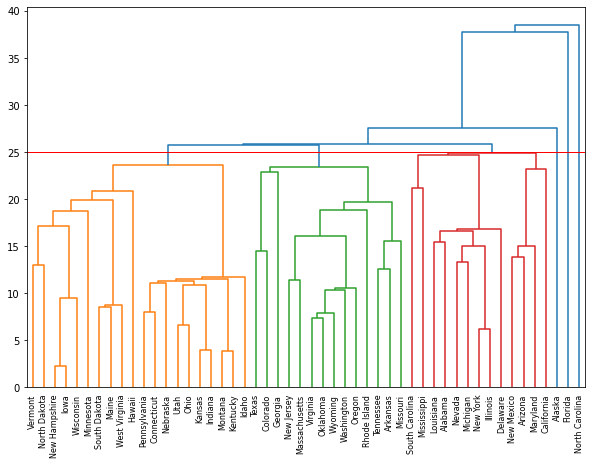

In [3]:
# 최단연결법
single = linkage(US.iloc[:, 1::], metric ='euclidean', method='single')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=25,   #군집의 수를 설정하는 Height 값 설정
            show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()


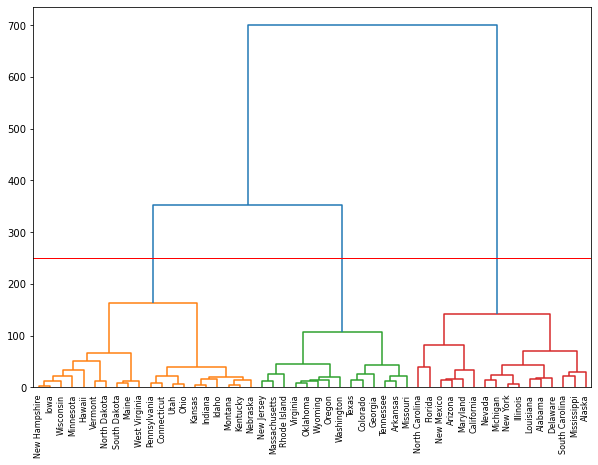

In [6]:
# 와드연결법
ward = linkage(US.iloc[:, 1::], metric ='euclidean', method='ward')
# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=250,
            show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()


In [7]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments


array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [8]:
US['cluster'] = assignments
US.groupby('cluster').mean()


,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [9]:
# 필요한 모듈
import pandas as pd 
from sklearn.cluster import KMeans
# 데이터 로드
iris = pd.read_csv('../data/iris.csv')
X = iris.drop('target',axis=1)
X


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# 클러스터별 콜린스키 하라바츠 결과 비교
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(X, labels))


513.3038433517568
560.3999242466402
529.1207190840455
494.0943819140986
474.51742958716295
448.8714494416451
436.61302488142496
414.5303174051382


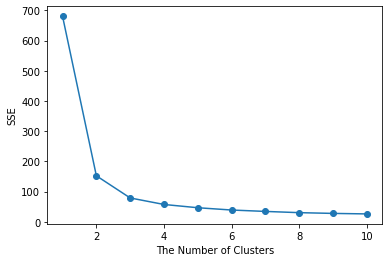

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.95701115711987, 34.32652991452991, 30.227724598930493, 27.766706937799047, 26.07225182334007]


In [13]:
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(X)

In [14]:
#최적의 k로  K-Means 군집화 실행
km = KMeans(n_clusters =3, random_state=1)
km.fit(X)
# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels

iris.groupby(['cluster']).mean()



,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


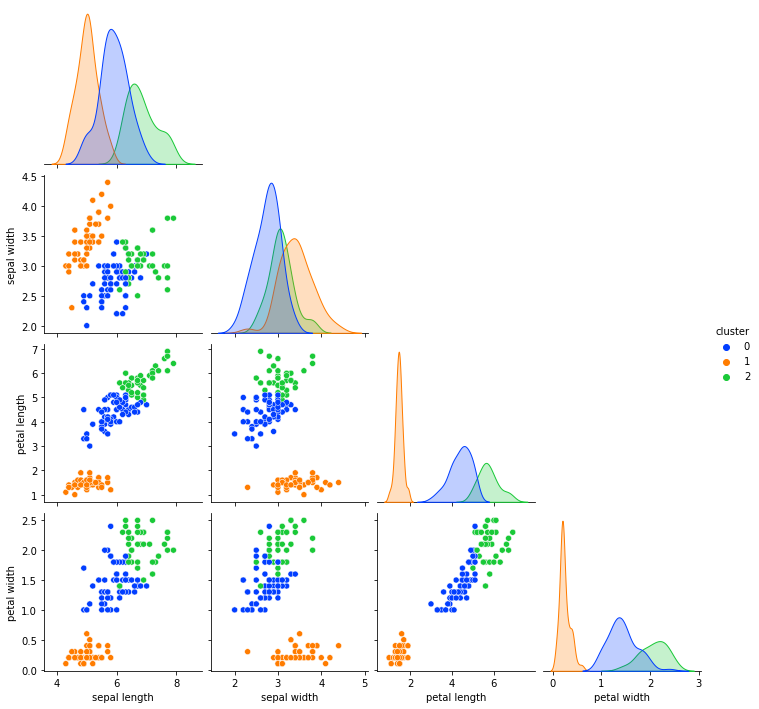

In [17]:
# k-means 시각화 
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris,
             diag_kind='kde',
             hue="cluster", 
             corner =True,  
             palette='bright')
plt.show()


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd 
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data,columns=["product"])
test_df.head()


,product
0,a
1,a
2,b
3,b
4,a


In [2]:

from statsmodels.sandbox.stats.runs import runstest_1samp

#Run-test를 위한 데이터 변환 
test_df.loc[test_df['product']=='a','product'] =1
test_df.loc[test_df['product']=='b','product'] =0

#Perform Runs test
# - run-test의 귀무가설 : 연속적인 관측값이 임의적이다. 
# - run-test의 대립가설 : 연속적인 관측값이 임의적이 아니다
runstest_1samp(test_df['product'],cutoff =0.5 , correction=True)


(-1.1144881152070183, 0.26506984027306035)

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary


['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [4]:
df = pd.DataFrame(te_ary,columns = te.columns_)
df


,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [5]:
## 지지도 60 % 이상인 품목만 추출 
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6, use_colnames=True)


,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)


In [6]:
## 규칙의 길이를 추출하는 방법 
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets


,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Apple, Beer)",2
5,0.375,"(Milk, Beer)",2
6,0.500,"(Beer, Rice)",2


In [8]:
df= pd.read_csv('../data/groceries.csv',)
df


,"citrus fruit,semi-finished bread,margarine,ready soups"
0,"tropical fruit,yogurt,coffee"
1,whole milk
2,"pip fruit,yogurt,cream cheese,meat spreads"
3,"other vegetables,whole milk,condensed milk,lon..."
4,"whole milk,butter,yogurt,rice,abrasive cleaner"
...,...
9829,"sausage,chicken,beef,hamburger meat,citrus fru..."
9830,cooking chocolate
9831,"chicken,citrus fruit,other vegetables,butter,y..."
9832,"semi-finished bread,bottled water,soda,bottled..."


In [9]:
df_split = df.iloc[:,0].str.split(',',expand=True)
df_split.values


array([['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ['pip fruit', 'yogurt', 'cream cheese', ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [ ]:
df_split_ary = df_split.values
groceries = []
for i in range(len(df_split_ary)) : 
    temp = list(filter(None,df_split_ary[i]))
    groceries.append(temp)
    
groceries


In [11]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te = TransactionEncoder()
groceries_tr = te.fit(groceries).transform(groceries)
groceries_tr = pd.DataFrame(groceries_tr, columns=te.columns_)
groceries_tr


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
from mlxtend.frequent_patterns import apriori
# 지지도가 5% 이상인 빈번 항목 집합 탐색

groceries_ap = apriori(groceries_tr, min_support=0.01, use_colnames=True)
groceries_ap


,support,itemsets
0,0.033455,(UHT-milk)
1,0.017694,(baking powder)
2,0.052471,(beef)
3,0.033252,(berries)
4,0.026032,(beverages)
...,...,...
328,0.011999,"(root vegetables, whole milk, tropical fruit)"
329,0.014541,"(root vegetables, whole milk, yogurt)"
330,0.010474,"(soda, whole milk, yogurt)"
331,0.015152,"(whole milk, yogurt, tropical fruit)"


In [13]:
from mlxtend.frequent_patterns import association_rules
# 신뢰도가 0.3 이상인 빈번 항목 집합 탐색
association_rules(groceries_ap, metric="confidence", min_threshold=0.3)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052471,0.193512,0.019727,0.375969,1.942869,0.009574,1.292384
1,(beef),(root vegetables),0.052471,0.109010,0.017389,0.331395,3.040058,0.011669,1.332612
2,(beef),(whole milk),0.052471,0.255542,0.021253,0.405039,1.585018,0.007844,1.251271
3,(berries),(other vegetables),0.033252,0.193512,0.010270,0.308869,1.596118,0.003836,1.166909
4,(berries),(whole milk),0.033252,0.255542,0.011796,0.354740,1.388187,0.003299,1.153733
...,...,...,...,...,...,...,...,...,...
120,"(soda, yogurt)",(whole milk),0.027354,0.255542,0.010474,0.382900,1.498382,0.003484,1.206381
121,"(whole milk, tropical fruit)",(yogurt),0.042302,0.139516,0.015152,0.358173,2.567255,0.009250,1.340679
122,"(tropical fruit, yogurt)",(whole milk),0.029286,0.255542,0.015152,0.517361,2.024564,0.007668,1.542474
123,"(whipped/sour cream, whole milk)",(yogurt),0.032235,0.139516,0.010881,0.337539,2.419361,0.006383,1.298921


In [14]:
rules = association_rules(groceries_ap, metric="lift", min_threshold=1)
# 규칙의 길이 컬럼 생성 
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >=2) &
       (rules['confidence'] >=0.4) &
       (rules['lift'] >=3) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
418,"(root vegetables, citrus fruit)",(other vegetables),0.017694,0.193512,0.010372,0.586207,3.029300,0.006948,1.949012,2
491,"(root vegetables, tropical fruit)",(other vegetables),0.021049,0.193512,0.012304,0.584541,3.020692,0.008231,1.941197,2


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import warnings

data = pd.read_csv('../data/arima_data.csv', names = ['day', 'price'])
data.head()


,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
data['day'] = pd.to_datetime(data['day'],format="%Y-%m-%d")
data.set_index('day', inplace=True)
data.head(3)


,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


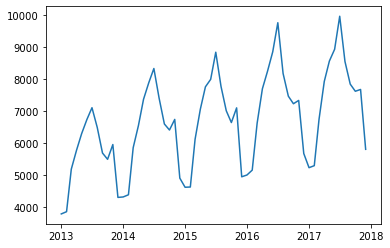

In [4]:
import matplotlib.pyplot as plt
plt.plot(data.index,data['price'])


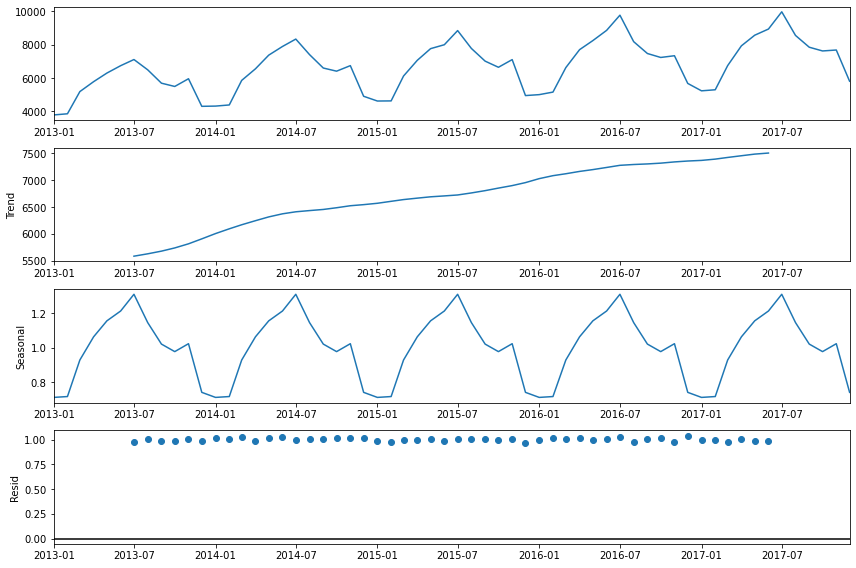

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()


In [6]:
from statsmodels.tsa.stattools import adfuller

#Train, Test 데이터 구분
training = data[:"2016-12-01"]
test = data.drop(training.index)


adf = adfuller(training, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))


ADF Statistic: -1.9997199341327796
p-value : 0.6015863303794179


<AxesSubplot:xlabel='day'>

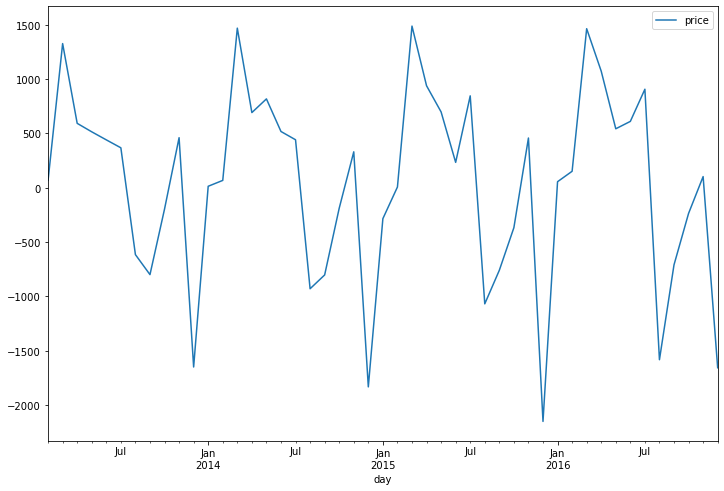

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = training.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()


In [8]:
adf = adfuller(diff_data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))


ADF Statistic: -12.094547576926441
p-value : 2.085160639960858e-22


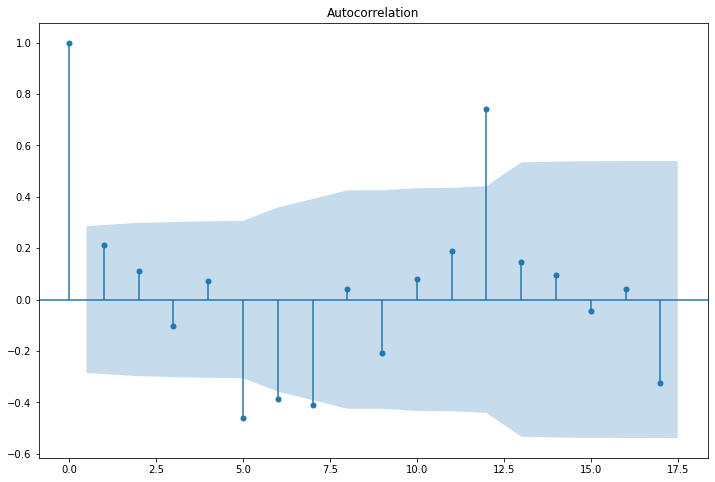

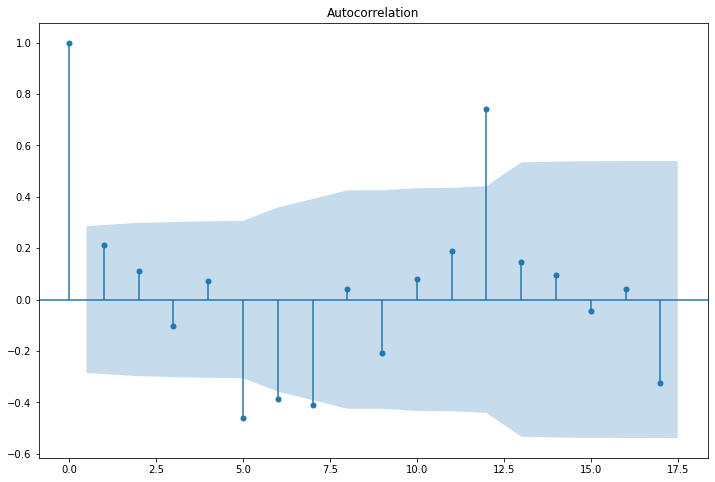

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_data) #AR(p)의 값 확인 가능


C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


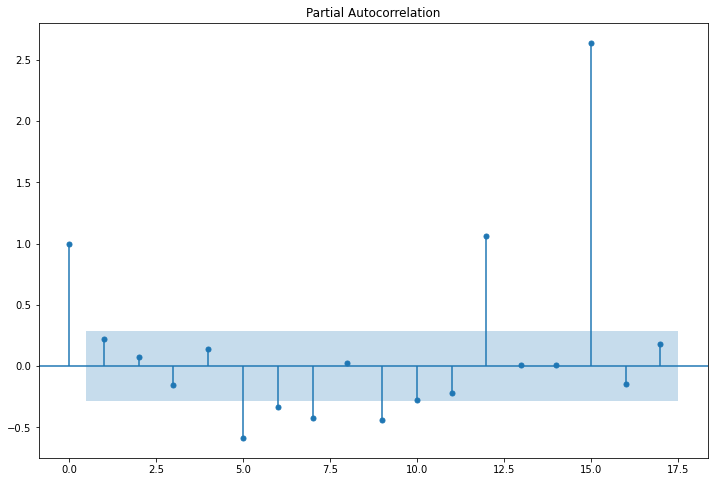

In [10]:
plot_pacf(diff_data) #MA(q)의 값 확인 가능

plt.show()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training, order=(2,1,2),trend='ct')
res = model.fit()
res.summary()


C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\statsmodels\tsa\statespace\sarimax.py

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.863
Date:                Tue, 19 Apr 2022   AIC                            765.725
Time:                        00:44:27   BIC                            778.676
Sample:                    01-01-2013   HQIC                           770.599
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0181   4212.891      0.000      1.000   -8256.096    8258.132
x1            36.9581    173.295      0.213      0.831    -302.694     376.610
ar.L1         -1.3081      0.232     -5.640      0.000      -1.763      -0.854
ar.L2         -0.3106      0.232     -1.336      0.181      -0.766       0.145
ma.L1          1.9535      0.265      7.370      0.000       1.434       2.473
ma.L2          0.9787      0.264      3.714      0.000       0.462       1.495
sigma2      4.472e+05      2.373   1.88e+05      0.000    4.47e+05    4.47e+05
===================================================================================
Ljung-Box (Q):                      102.12   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.00   Prob(JB):                         0.84
Heteroskedasticity (H):               1.52   Skew:                            -0.20
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.08e+22. Standard errors may be unstable.
"""

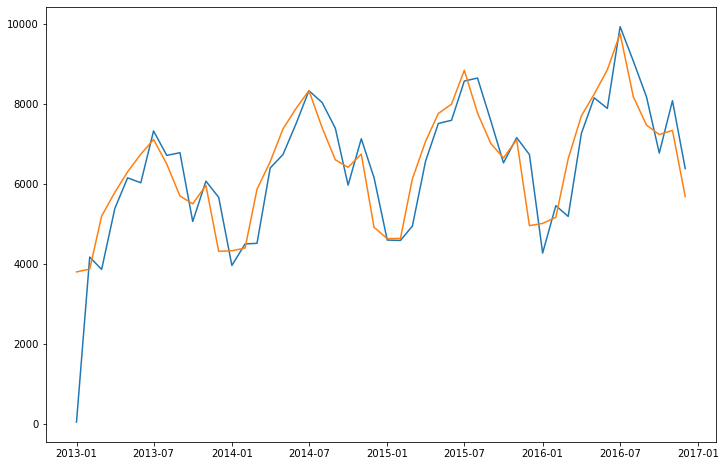

In [12]:
plt.plot(res.predict())
plt.plot(training)


In [13]:
forecast_data = res.forecast(steps=len(test), alpha=0.05) 
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측합니다.

pred_y= forecast_data
pred_y


2017-01-01    4073.726974
2017-02-01    3793.736188
2017-03-01    4204.071305
2017-04-01    3851.044855
2017-05-01    4282.186321
2017-06-01    3924.626494
2017-07-01    4355.235997
2017-08-01    3999.780058
2017-09-01    4427.802627
2017-10-01    4075.077287
2017-11-01    4500.331353
2017-12-01    4150.379479
Freq: MS, dtype: float64

In [14]:
test_y = test # 실제 데이터
test_y


,price
day,
2017-01-01,5236
2017-02-01,5299
2017-03-01,6744
2017-04-01,7927
2017-05-01,8561
2017-06-01,8930
2017-07-01,9960
2017-08-01,8548
2017-09-01,7843


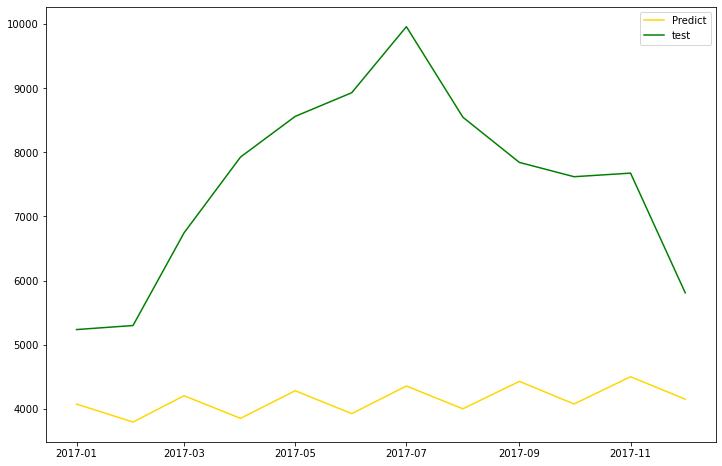

In [15]:
plt.plot(pred_y, color="gold", label='Predict') # 모델이 예상한 가격 그래프
plt.plot(test_y, color="green" , label='test') # 실제 가격 그래프
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("r2_score : ", r2_score(test_y, pred_y))
RMSE = mean_squared_error(test_y, pred_y)**0.5
print("RMSE : " , RMSE)


r2_score :  -5.615778286393547
RMSE :  3642.446338871415


In [17]:
from pmdarima import auto_arima

auto_model = auto_arima(training, start_p=0, d=1, start_q=0,
                        max_p=3, max_q=3, 
                        start_P=0, start_Q=0,
                        max_P=3, max_Q=3, m=12,
                        seasonal=True, information_criterion='aic',
                        trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [18]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Tue, 19 Apr 2022   AIC                            480.687
Time:                                     00:44:30   BIC                            483.798
Sample:                                          0   HQIC                           481.761
                                              - 48                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (Q):                       23.53   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.91   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
# 학습 데이터셋으로부터 test 데이터 길이만큼 예측
auto_pred_y= pd.DataFrame(auto_model.predict(n_periods=len(test)), 
                          index=test.index) 
auto_pred_y.columns = ['predicted_price']
auto_pred_y


,predicted_price
day,
2017-01-01,5609.43698
2017-02-01,5761.43698
2017-03-01,7225.43698
2017-04-01,8298.43698
2017-05-01,8841.43698
2017-06-01,9452.43698
2017-07-01,10359.43698
2017-08-01,8777.43698
2017-09-01,8068.43698


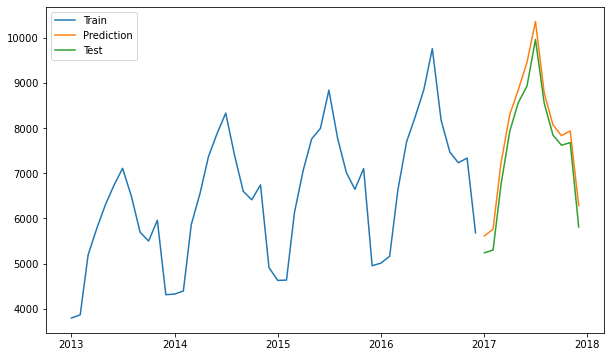

In [20]:
plt.figure(figsize=(10,6))
plt.plot(training, label="Train") # Train 데이터 
plt.plot(auto_pred_y, label="Prediction") # 모델이 예상한 그래프 
plt.plot(test, label="Test") # 실제 가격 그래프 
plt.legend(loc='upper left')
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("r2_score : ", r2_score(test_y, auto_pred_y))
RMSE = mean_squared_error(test_y, auto_pred_y)**0.5
print("RMSE : " , RMSE)


r2_score :  0.9305467058376857
RMSE :  373.20642840321074
